# Espectrograma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib inline

In [2]:
# Parámetros

L = 64
M = 10000
N = L*M

fs = 1000
n = np.arange(N)

# Señal aleatoria
h = np.array([1,1,1,1])
#h = h / np.sqrt(np.mean(h**2))
lenh = np.size(h)
x1 = np.random.randn(N+lenh-1)
x = np.convolve(x1,h,mode='full')
wo = np.pi/2 + 0.2
x = x[lenh-1:N+lenh-1] + 1*np.cos(wo*n)

(0.0, 79999.0)

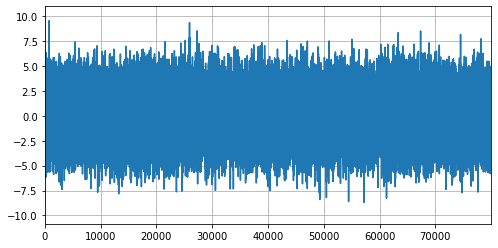

In [3]:
fig, ax = plt.subplots(figsize=[8,4])
ax.plot(n,x)
ax.grid('on')
ax.set_xlim([0,N/8-1])

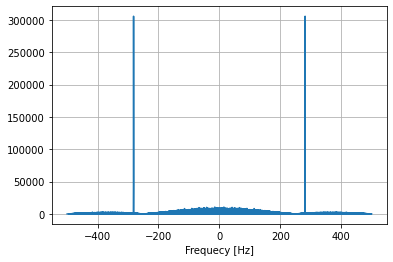

In [4]:
Xk = np.fft.fft(x)
Xk = np.fft.fftshift(Xk)
f = (np.arange(N)-N/2)*fs/N

fig = plt.figure()
plt.plot(f,np.abs(Xk))
plt.grid('on')
plt.xlabel('Frequecy [Hz]');

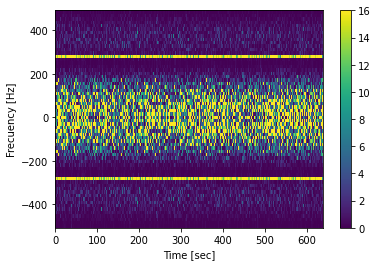

In [5]:
# Método Barlett
Xper = np.zeros([M,L])
for m in range(M):
    xm = x[m*L:(m+1)*L]
    Xper[m,:] = np.abs(np.fft.fft(xm))**2 / L

Xper = np.fft.fftshift(Xper,axes=1)
fk = (np.arange(L) - L/2) * fs / L
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xper.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.colorbar(c)

Text(0.5, 0, 'Frecuency [Hz]')

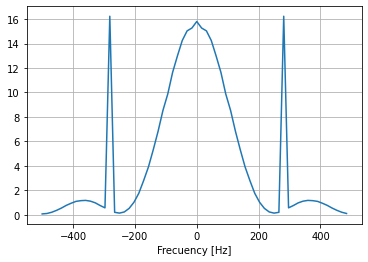

In [6]:
per = np.mean(Xper,axis=0)
plt.figure()
plt.plot(fk,per)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')

In [7]:
# Método Welch - Windowing
w = np.hamming(L)
w = w / np.sqrt(np.mean(np.abs(w)**2))
Xperw = np.zeros([M,L])
for m in range(M):
    xm = w*x[m*L:(m+1)*L]
    Xperw[m,:] = np.abs(np.fft.fft(xm))**2 / L

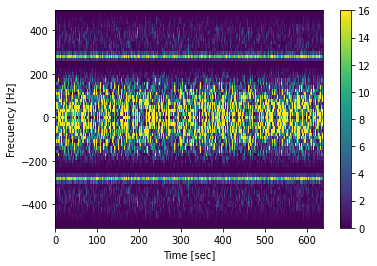

In [8]:
Xperw = np.fft.fftshift(Xperw,axes=1)
fig = plt.figure()
c = plt.pcolormesh(tm,fk,np.abs(Xperw.T),shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.colorbar(c)

Text(0.5, 0, 'Frecuency [Hz]')

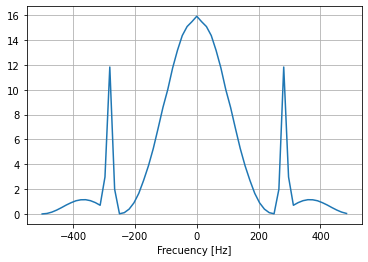

In [9]:
perw = np.mean(Xperw,axis=0)
plt.figure()
plt.plot(fk,perw)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')

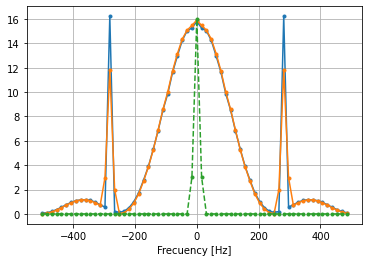

In [10]:
# Comparando espectros
Wk2 = np.abs(np.fft.fftshift(np.fft.fft(w)))**2
L2 = np.int64(L/2)
Wk2 = 16* Wk2/Wk2[L2]
fig = plt.figure()
plt.plot(fk,per,'.-')
plt.plot(fk,perw,'.-')
plt.plot(fk,Wk2,'.--')
plt.xlabel('Frecuency [Hz]')
plt.grid('on')
